<a href="https://colab.research.google.com/github/nducduy/VBnote/blob/main/MieanFieldApproxUnitVarianceGaussianMixture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
#Credit: the code is a modidication of the code written by https://zhiyzuo.github.io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random


class UGMM(object):
    '''Univariate GMM with CAVI'''
    def __init__(self, X, K=2, sigma=1,seedNumber=100):
        self.X = X #data set
        self.K = K #number of components
        self.N = self.X.shape[0] #data size
        self.sigma2 = sigma**2 #sigma squared
        self.Seed=seedNumber #random seed

    def _init(self):
        random.seed(self.Seed) #set the random seed
        self.phi = np.random.dirichlet([np.random.random()*np.random.randint(1, 10)]*self.K, self.N) #initiate phi_{ik}
        self.m = np.random.randint(int(self.X.min()), high=int(self.X.max()), size=self.K).astype(float) #initiate m_k
        self.m += self.X.max()*np.random.random(self.K)
        self.s2 = np.ones(self.K) * np.random.random(self.K) #initiate sigma^2_k
        print('Init mean')
        print(self.m)
        print('Init s2')
        print(self.s2)

    def get_elbo(self):
        t1 = np.log(self.s2) - self.m/self.sigma2
        t1 = t1.sum()
        t2 = -0.5*np.add.outer(self.X**2, self.s2+self.m**2)
        t2 += np.outer(self.X, self.m)
        t2 -= np.log(self.phi)
        t2 *= self.phi
        t2 = t2.sum()
        return t1 + t2

    def fit(self, max_iter=100, tol=1e-10):
        self._init()
        self.elbo_values = [self.get_elbo()]
        self.m_history = [self.m]
        self.s2_history = [self.s2]
        for iter_ in range(1, max_iter+1):
            self._cavi()
            self.m_history.append(self.m)
            self.s2_history.append(self.s2)
            self.elbo_values.append(self.get_elbo())
            if iter_ % 5 == 0:
                print(iter_, self.m_history[iter_])
            if np.abs(self.elbo_values[-2] - self.elbo_values[-1]) <= tol:
                print('ELBO converged with ll %.3f at iteration %d'%(self.elbo_values[-1],
                                                                     iter_))
                break

        if iter_ == max_iter:
            print('ELBO ended with ll %.3f'%(self.elbo_values[-1]))
        #plot the ELBO
        plt.plot(self.elbo_values)
        plt.show()


    def _cavi(self):
        self._update_phi()
        self._update_mu()

    def _update_phi(self):
        t1 = np.outer(self.X, self.m)
        t2 = -(0.5*self.m**2 + 0.5*self.s2)
        exponent = t1 + t2[np.newaxis, :]
        self.phi = np.exp(exponent)
        self.phi = self.phi / self.phi.sum(1)[:, np.newaxis]

    def _update_mu(self):
        self.m = (self.phi*self.X[:, np.newaxis]).sum(0) * (1/self.sigma2 + self.phi.sum(0))**(-1)
        assert self.m.size == self.K
        #print(self.m)
        self.s2 = (1/self.sigma2 + self.phi.sum(0))**(-1)
        assert self.s2.size == self.K



<ipython-input-69-5bf95ce2e5a7>:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[SAMPLE*i:SAMPLE*(i+1)], ax=ax, rug=True)
<ipython-input-69-5bf95ce2e5a7>:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[SAMPLE*i:SAMPLE*(i+1)], ax=ax, rug=True)
<ipython-input-69-5bf95ce2e5a7>:19: UserWarnin

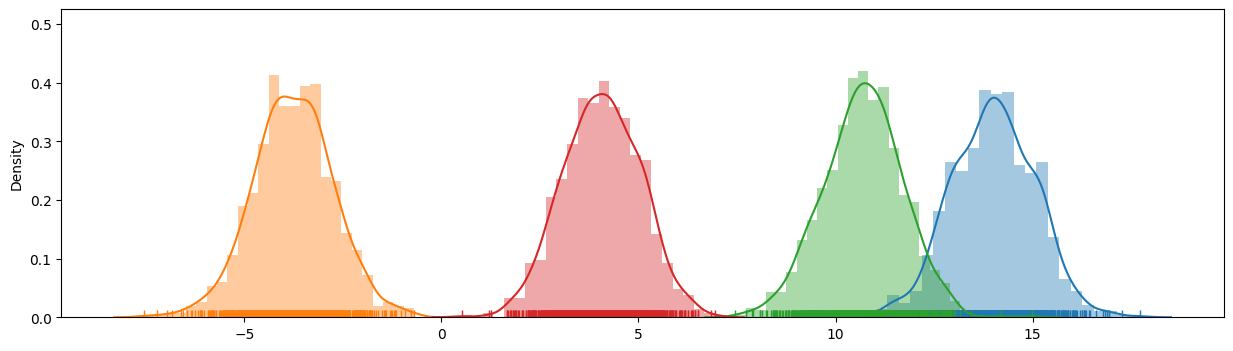

In [69]:
import random

random.seed(100)

K = 4 #number of components
mu_arr = np.random.choice(np.arange(-20, 20, 2),
                          K) +\
         np.random.random(K)
mu_arr
SAMPLE = 1000

X = np.random.normal(loc=mu_arr[0], scale=1, size=SAMPLE)
for i, mu in enumerate(mu_arr[1:]):
    X = np.append(X, np.random.normal(loc=mu, scale=1, size=SAMPLE))

fig, ax = plt.subplots(figsize=(15, 4))
for i in range(0,K):
 sns.distplot(X[SAMPLE*i:SAMPLE*(i+1)], ax=ax, rug=True)


Init mean
[-3.39511765  4.2964883   7.80744971 11.23529811]
Init s2
[0.30488339 0.20265511 0.77033112 0.21735511]
5 [-3.75470325  4.06482781 10.62893785 13.93607275]
10 [-3.75470132  4.06583402 10.69982226 14.01132072]
15 [-3.75470129  4.06584815 10.70069727 14.01219284]
20 [-3.75470129  4.06584832 10.70070777 14.01220329]
25 [-3.75470129  4.06584832 10.70070789 14.01220341]
30 [-3.75470129  4.06584832 10.70070789 14.01220342]
ELBO converged with ll -1834.676 at iteration 33


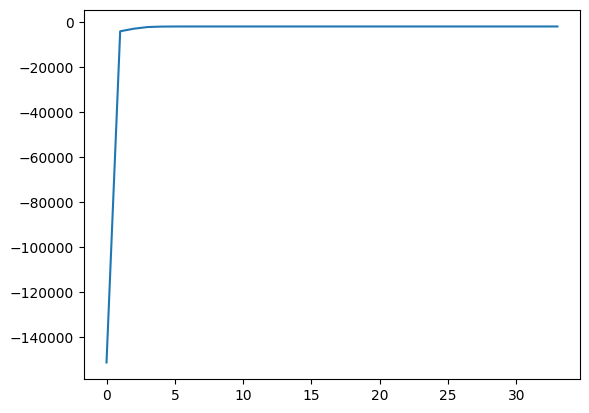

<ipython-input-71-16ec2c527f18>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[SAMPLE*i:SAMPLE*(i+1)], ax=ax, hist=True,color='r', norm_hist=True)
<ipython-input-71-16ec2c527f18>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.random.normal(ugmm.m[i], 1, SAMPLE), color='b', hist

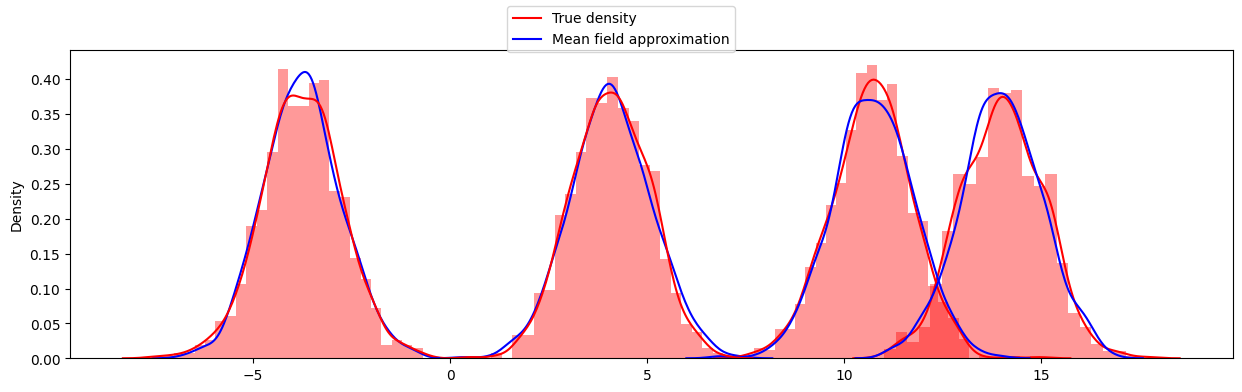

In [71]:
#define Model fit
ugmm = UGMM(X, K)
ugmm.fit()
fig, ax = plt.subplots(figsize=(15, 4))
for i in range(0,K):
 sns.distplot(X[SAMPLE*i:SAMPLE*(i+1)], ax=ax, hist=True,color='r', norm_hist=True)
 sns.distplot(np.random.normal(ugmm.m[i], 1, SAMPLE), color='b', hist=False, kde=True)

fig.legend(labels=['True density','Mean field approximation'],loc='upper center')
#Save the image
from google.colab import files

plt.savefig('test.pdf',bbox_inches = 'tight')
plt.show()
